## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  22.060351  668.201553  0.421643  8.873236  1.531307
1  29.685612  523.261944  0.592706  4.541503  1.480006
2  88.272358  297.394632  0.112998  1.235465  0.443305
3   2.996709  413.690969  0.078312  8.722379  1.499550
4  60.162856  999.340950  0.792733  3.032078  1.439917


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0305616	total: 67.9ms	remaining: 1m 7s
1:	learn: 1.0223299	total: 68.7ms	remaining: 34.3s
2:	learn: 1.0123444	total: 69.3ms	remaining: 23s
3:	learn: 0.9997845	total: 69.6ms	remaining: 17.3s
4:	learn: 0.9879840	total: 70.2ms	remaining: 14s
5:	learn: 0.9780335	total: 70.8ms	remaining: 11.7s
6:	learn: 0.9655732	total: 71.3ms	remaining: 10.1s
7:	learn: 0.9539424	total: 71.8ms	remaining: 8.9s
8:	learn: 0.9446303	total: 72.3ms	remaining: 7.96s
9:	learn: 0.9349109	total: 72.8ms	remaining: 7.21s
10:	learn: 0.9208412	total: 73.3ms	remaining: 6.59s
11:	learn: 0.9112771	total: 73.8ms	remaining: 6.07s
12:	learn: 0.8982643	total: 74.3ms	remaining: 5.64s
13:	learn: 0.8881114	total: 74.8ms	remaining: 5.27s
14:	learn: 0.8789915	total: 75.3ms	remaining: 4.94s
15:	learn: 0.8679177	total: 75.8ms	remaining: 4.66s
16:	learn: 0.8578603	total: 76.3ms	remaining: 4.41s
17:	learn: 0.8475381	total: 76.8ms	remaining: 4.19s
18:	learn: 0.8370133	total: 77.3ms	remaining: 3.9

94:	learn: 0.4158280	total: 109ms	remaining: 1.04s
95:	learn: 0.4121626	total: 109ms	remaining: 1.03s
96:	learn: 0.4085662	total: 110ms	remaining: 1.02s
97:	learn: 0.4049370	total: 110ms	remaining: 1.01s
98:	learn: 0.4009387	total: 111ms	remaining: 1s
99:	learn: 0.3974940	total: 111ms	remaining: 997ms
100:	learn: 0.3948085	total: 111ms	remaining: 990ms
101:	learn: 0.3925825	total: 112ms	remaining: 983ms
102:	learn: 0.3895546	total: 112ms	remaining: 976ms
103:	learn: 0.3865469	total: 112ms	remaining: 969ms
104:	learn: 0.3838823	total: 113ms	remaining: 962ms
105:	learn: 0.3813749	total: 113ms	remaining: 956ms
106:	learn: 0.3779034	total: 114ms	remaining: 950ms
107:	learn: 0.3754087	total: 114ms	remaining: 944ms
108:	learn: 0.3730623	total: 115ms	remaining: 938ms
109:	learn: 0.3699943	total: 115ms	remaining: 932ms
110:	learn: 0.3676143	total: 116ms	remaining: 927ms
111:	learn: 0.3641363	total: 116ms	remaining: 921ms
112:	learn: 0.3618172	total: 117ms	remaining: 916ms
113:	learn: 0.3593353

270:	learn: 0.1687373	total: 186ms	remaining: 500ms
271:	learn: 0.1680643	total: 186ms	remaining: 498ms
272:	learn: 0.1673318	total: 187ms	remaining: 497ms
273:	learn: 0.1667449	total: 187ms	remaining: 496ms
274:	learn: 0.1659721	total: 188ms	remaining: 495ms
275:	learn: 0.1656376	total: 188ms	remaining: 494ms
276:	learn: 0.1652387	total: 189ms	remaining: 492ms
277:	learn: 0.1648633	total: 189ms	remaining: 491ms
278:	learn: 0.1645013	total: 189ms	remaining: 490ms
279:	learn: 0.1638509	total: 190ms	remaining: 488ms
280:	learn: 0.1635539	total: 190ms	remaining: 486ms
281:	learn: 0.1632295	total: 190ms	remaining: 485ms
282:	learn: 0.1626143	total: 191ms	remaining: 483ms
283:	learn: 0.1622958	total: 191ms	remaining: 482ms
284:	learn: 0.1616725	total: 191ms	remaining: 480ms
285:	learn: 0.1613470	total: 192ms	remaining: 479ms
286:	learn: 0.1607764	total: 192ms	remaining: 477ms
287:	learn: 0.1604466	total: 193ms	remaining: 476ms
288:	learn: 0.1600387	total: 193ms	remaining: 475ms
289:	learn: 

517:	learn: 0.0864613	total: 291ms	remaining: 270ms
518:	learn: 0.0862838	total: 291ms	remaining: 270ms
519:	learn: 0.0860090	total: 291ms	remaining: 269ms
520:	learn: 0.0857185	total: 292ms	remaining: 268ms
521:	learn: 0.0854061	total: 292ms	remaining: 268ms
522:	learn: 0.0850557	total: 293ms	remaining: 267ms
523:	learn: 0.0849768	total: 293ms	remaining: 266ms
524:	learn: 0.0847107	total: 293ms	remaining: 265ms
525:	learn: 0.0845399	total: 294ms	remaining: 265ms
526:	learn: 0.0841867	total: 294ms	remaining: 264ms
527:	learn: 0.0838426	total: 294ms	remaining: 263ms
528:	learn: 0.0835489	total: 295ms	remaining: 263ms
529:	learn: 0.0830927	total: 295ms	remaining: 262ms
530:	learn: 0.0828642	total: 296ms	remaining: 261ms
531:	learn: 0.0827107	total: 296ms	remaining: 261ms
532:	learn: 0.0825478	total: 297ms	remaining: 260ms
533:	learn: 0.0822146	total: 297ms	remaining: 259ms
534:	learn: 0.0820580	total: 298ms	remaining: 259ms
535:	learn: 0.0819081	total: 298ms	remaining: 258ms
536:	learn: 

700:	learn: 0.0597124	total: 367ms	remaining: 157ms
701:	learn: 0.0595546	total: 368ms	remaining: 156ms
702:	learn: 0.0594000	total: 368ms	remaining: 156ms
703:	learn: 0.0593814	total: 369ms	remaining: 155ms
704:	learn: 0.0592301	total: 369ms	remaining: 154ms
705:	learn: 0.0591380	total: 369ms	remaining: 154ms
706:	learn: 0.0590545	total: 370ms	remaining: 153ms
707:	learn: 0.0590363	total: 370ms	remaining: 153ms
708:	learn: 0.0590183	total: 371ms	remaining: 152ms
709:	learn: 0.0588699	total: 371ms	remaining: 152ms
710:	learn: 0.0588445	total: 371ms	remaining: 151ms
711:	learn: 0.0586990	total: 372ms	remaining: 150ms
712:	learn: 0.0586167	total: 372ms	remaining: 150ms
713:	learn: 0.0584741	total: 373ms	remaining: 149ms
714:	learn: 0.0583830	total: 373ms	remaining: 149ms
715:	learn: 0.0583656	total: 374ms	remaining: 148ms
716:	learn: 0.0583021	total: 374ms	remaining: 148ms
717:	learn: 0.0582849	total: 375ms	remaining: 147ms
718:	learn: 0.0581450	total: 375ms	remaining: 147ms
719:	learn: 

948:	learn: 0.0371375	total: 472ms	remaining: 25.4ms
949:	learn: 0.0370567	total: 473ms	remaining: 24.9ms
950:	learn: 0.0369581	total: 473ms	remaining: 24.4ms
951:	learn: 0.0368872	total: 473ms	remaining: 23.9ms
952:	learn: 0.0368078	total: 474ms	remaining: 23.4ms
953:	learn: 0.0367495	total: 474ms	remaining: 22.9ms
954:	learn: 0.0366811	total: 474ms	remaining: 22.4ms
955:	learn: 0.0364869	total: 475ms	remaining: 21.8ms
956:	learn: 0.0364308	total: 475ms	remaining: 21.3ms
957:	learn: 0.0362408	total: 476ms	remaining: 20.8ms
958:	learn: 0.0360367	total: 476ms	remaining: 20.3ms
959:	learn: 0.0358518	total: 476ms	remaining: 19.8ms
960:	learn: 0.0357931	total: 477ms	remaining: 19.3ms
961:	learn: 0.0355947	total: 477ms	remaining: 18.8ms
962:	learn: 0.0355505	total: 477ms	remaining: 18.3ms
963:	learn: 0.0354650	total: 478ms	remaining: 17.8ms
964:	learn: 0.0353976	total: 478ms	remaining: 17.4ms
965:	learn: 0.0353584	total: 479ms	remaining: 16.8ms
966:	learn: 0.0353212	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

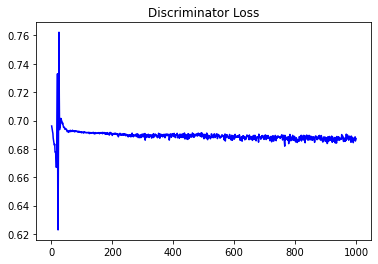

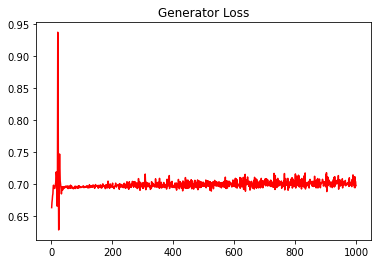

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2279866778603648


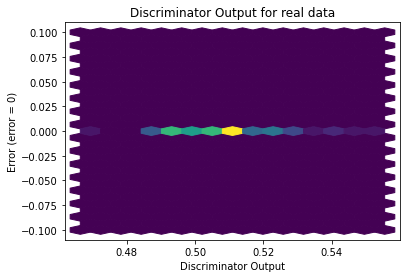

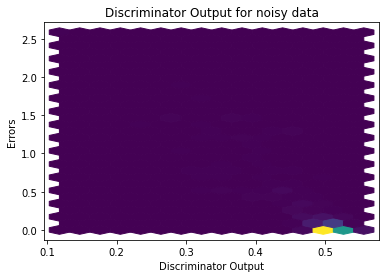

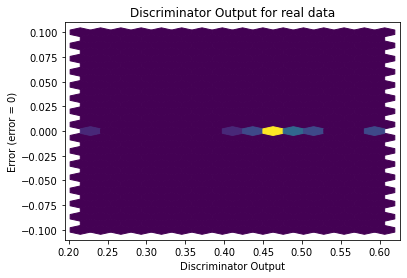

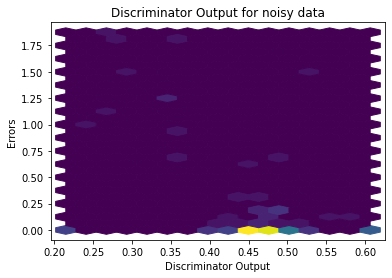

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


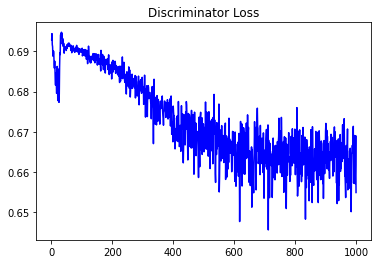

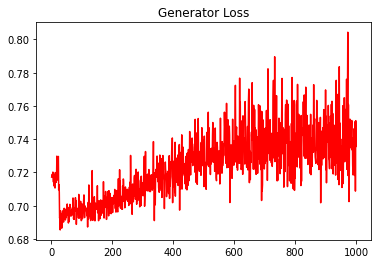

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2534809271524828


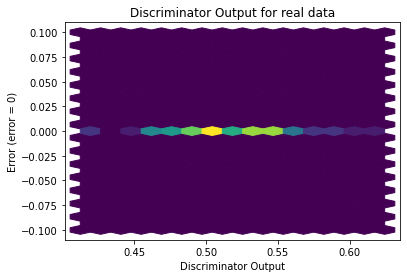

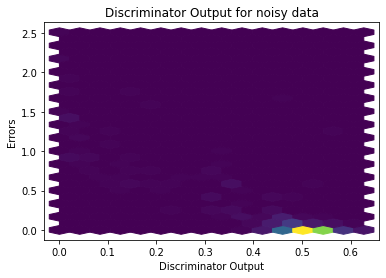

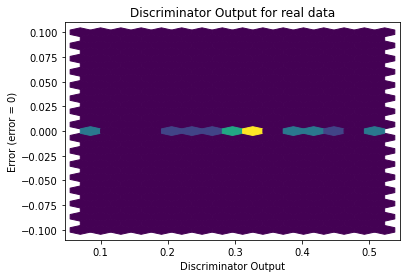

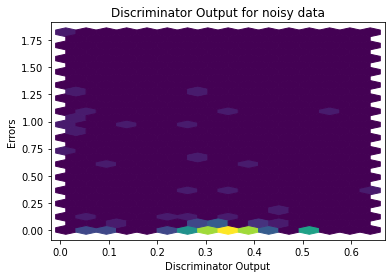

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1949]], requires_grad=True)
